In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [12]:
#data for assignment
training_data = np.loadtxt("homework_6_train.txt")
X_train = training_data[:,0:2] #selects columns 1 and 2, which are the x and y coords of the data
Y_train = training_data[:,2] #selections column 3, which is the 0 or 1 label of the data

test_data = np.loadtxt("homework_6_test.txt")
X_test = test_data[:,0:2]
Y_test = test_data[:,2]

#for plotting
X_1 = []
X_2 = []
for row in range(X_train.shape[0]):
    if Y_train[row] == 0:
        X_1.append(X_train[row,:])
    else:
        X_2.append(X_train[row,:])
X_1 = np.asarray(X_1)
X_2 = np.asarray(X_2)

### Problem 1

In [6]:
svm_model_obj = SVC(gamma='auto', kernel='linear')
svm_model_obj.fit(X_train, Y_train)

Y_hat = svm_model_obj.predict(X_train)

p = sklearn.metrics.precision_score(Y_train, Y_hat)  #order of inputs for these functions is true, prediction
r = sklearn.metrics.recall_score(Y_train, Y_hat)

print("Training precision: ", p)
print("Training recall: ", r)

Training precision:  1.0
Training recall:  1.0


In [9]:
Y_hat_test = svm_model_obj.predict(X_test)

p_t = sklearn.metrics.precision_score(Y_test, Y_hat_test)
r_t = sklearn.metrics.recall_score(Y_test, Y_hat_test)

print("Training precision: ", p_t)
print("Training recall: ", r_t)

Training precision:  1.0
Training recall:  1.0


### Problem 2

In [10]:
logreg_model_obj = LogisticRegression()
logreg_model_obj.fit(X_train, Y_train)

Y_hat = logreg_model_obj.predict(X_test)

p = sklearn.metrics.precision_score(Y_test, Y_hat) 
r = sklearn.metrics.recall_score(Y_test, Y_hat)

print("Test precision: ", p)
print("Test recall: ", r)

Test precision:  0.9803921568627451
Test recall:  1.0


### Problem 3a

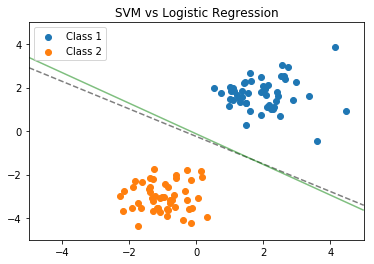

In [13]:
#set up the range of values over which to consider the function
xx = np.linspace(-5, 5, 30)
yy = np.linspace(-5, 5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

#get the values of the decision function over the range of values above
Z = svm_model_obj.decision_function(xy).reshape(XX.shape)
Z_log_reg = logreg_model_obj.decision_function(xy).reshape(XX.shape)

#plot the data
plt.scatter(X_1[:,0], X_1[:,1], label="Class 1")
plt.scatter(X_2[:,0], X_2[:,1], label="Class 2")
c = plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['--'])
c = plt.contour(XX, YY, Z_log_reg, colors='g', levels=[0], alpha=0.5,
           linestyles=['-'])
plt.legend()
plt.title("SVM vs Logistic Regression", fontsize=12)
plt.show()

### Problem 3b

In [15]:
X_train_outlier = np.vstack((X_train, np.array([5, -2.5])))  #adding the outlier
Y_train_outlier = np.concatenate((Y_train, np.array([1.0])))   #adding the label for the outlier

#for plotting
X_1_outlier = []
X_2_outlier = []
for row in range(X_train_outlier.shape[0]):
    if Y_train_outlier[row] == 0:
        X_1_outlier.append(X_train_outlier[row,:])
    else:
        X_2_outlier.append(X_train_outlier[row,:])
X_1_outlier = np.asarray(X_1_outlier)
X_2_outlier = np.asarray(X_2_outlier)

In [16]:
svm_model_obj_out = SVC(gamma='auto', kernel='linear')
svm_model_obj_out.fit(X_train_outlier, Y_train_outlier)

logreg_model_obj_out = LogisticRegression()
logreg_model_obj_out.fit(X_train_outlier, Y_train_outlier)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

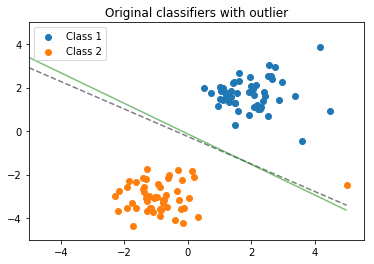

In [17]:
#get the values of the decision function over the range of values above
Z = svm_model_obj.decision_function(xy).reshape(XX.shape)
Z_log_reg = logreg_model_obj.decision_function(xy).reshape(XX.shape)

#plot the data
plt.scatter(X_1_outlier[:,0], X_1_outlier[:,1], label="Class 1")
plt.scatter(X_2_outlier[:,0], X_2_outlier[:,1], label="Class 2")
c = plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['--'])
c = plt.contour(XX, YY, Z_log_reg, colors='g', levels=[0], alpha=0.5,
           linestyles=['-'])
plt.legend()
plt.title("Original classifiers with outlier", fontsize=12)
plt.show()

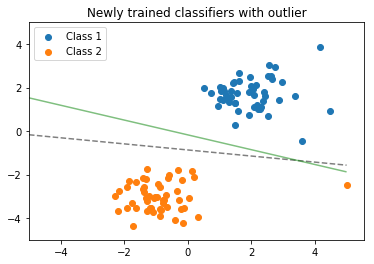

In [18]:
#get the values of the decision function over the range of values above
Z = svm_model_obj_out.decision_function(xy).reshape(XX.shape)
Z_log_reg = logreg_model_obj_out.decision_function(xy).reshape(XX.shape)

#plot the data
plt.scatter(X_1_outlier[:,0], X_1_outlier[:,1], label="Class 1")
plt.scatter(X_2_outlier[:,0], X_2_outlier[:,1], label="Class 2")
c = plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['--'])
c = plt.contour(XX, YY, Z_log_reg, colors='g', levels=[0], alpha=0.5,
           linestyles=['-'])
plt.legend()
plt.title("Newly trained classifiers with outlier", fontsize=12)
plt.show()

### Bonus

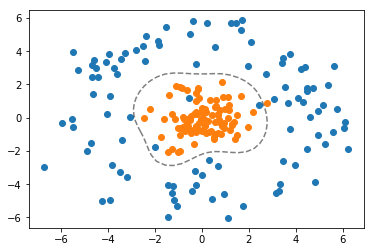

In [20]:
data_bonus = np.loadtxt("homework_6_bonus.txt")
X_b = data_bonus[:,0:2]
Y_b = data_bonus[:,2]

X_1 = []
X_2 = []
for row in range(X_b.shape[0]):
    if Y_b[row] == 0:
        X_1.append(X_b[row,:])
    else:
        X_2.append(X_b[row,:])
X_1 = np.asarray(X_1)
X_2 = np.asarray(X_2)

svm_model_obj = SVC(gamma='auto', kernel='rbf')
svm_model_obj.fit(X_b, Y_b)

xx = np.linspace(-5, 5, 30)
yy = np.linspace(-5, 5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_model_obj.decision_function(xy).reshape(XX.shape)

plt.scatter(X_1[:,0], X_1[:,1], label="Class 1")
plt.scatter(X_2[:,0], X_2[:,1], label="Class 2")
c = plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['--'])

plt.show()